<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h3>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/SantoTome"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros<p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Altitud',
 'Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Overland_Flow_Distance',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[1])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Tamaño archivos cargados: 1448 x 2082 



<p>Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1</p>

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    band = band[1:y, 1:x]
    
    # Reconstruimos el array con el tamaño de filas x columnas
    x_recorte = x - 1
    y_recorte = y - 1
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1

<hr>
<h3>Tratamiento de datos</h3>

In [8]:
print("Número de datos antes del tratamiento ", datos.size)

datos = datos[datos['Carcavas'] != -9999]
datos = datos[datos['Orientaciones'] != 0]
datos = datos[datos['Distancia_Carreteras'] >= 0]
datos = datos[datos['Factor_LS'] >= 0]
datos = datos[datos['Pendiente'] != -9999.0]

print("Número de datos despues del tratamiento ", datos.size)

datos.Factor_LS = datos.Factor_LS.round(4) 

# Aqui deberían incluirse los labelenconders ONE HOT (?)

Número de datos antes del tratamiento  60224140
Número de datos despues del tratamiento  31957100


<hr>
<h3>Proceso de visualización de datos</h3>

<h4>1. ALTITUD (Continua)</h4>
<p>Datos únicos: </p>

In [9]:
print(datos.Altitud.unique())

[438.50299072 438.70098877 438.9460144  ... 507.91000366 566.16497803
 585.88098145]


In [10]:
print("Máximo: ", max(datos.Altitud))
print("Mínimo: ", min(datos.Altitud))
print("Media: ", datos["Altitud"].mean())
print("STD: ", datos["Altitud"].std())


Máximo:  849.635009765625
Mínimo:  427.5570068359375
Media:  598.2872667447682
STD:  85.70219241899592


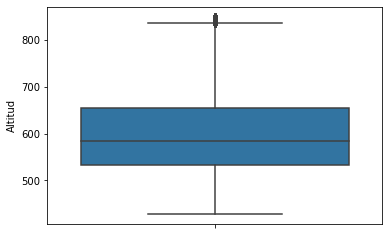

In [11]:
sns.boxplot( y=datos["Altitud"] );
plt.show()

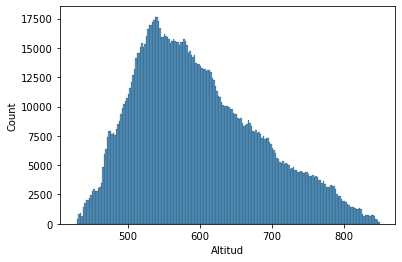

In [12]:
sns.histplot(data=datos, x="Altitud")
plt.show()

<hr>
<h4>2. ARCILLAS (Continua)</h4>
<p>Datos únicos: </p>

In [13]:
print(datos.Arcillas.unique())

[31.75813103 36.81389236 37.20759201 40.04796219 31.6607933  42.43583679
 40.21904373 37.84952545 36.95042801 32.29443741 35.4302063  36.11117554
 35.07839203 32.9157753  33.3037796  40.26624298 38.10226059 40.10350037
 40.21327209 38.41845703 33.60386276 33.32458496 34.3403511  33.88726425
 34.58242798 31.9856739  36.71850967 36.33438873 35.85596848 38.26751328
 37.56327438 34.43656921 31.46871567 33.76166916 36.95221329 40.99275208
 38.34677124 37.27456665 33.07227707 34.60289001 38.65610886 36.018013
 35.17227936 35.01656342 37.42977142 37.44367599 32.14209366 34.61552429
 35.51926422 37.39848328 39.59401703 40.72028351 32.40776062 36.97797012
 36.21855164 36.01535034 35.93242264 40.23360062 36.67612457 35.65941238
 38.11412048 39.08292007 41.02215958 37.0511055  35.5803299  33.55998611
 34.12625504 33.80471039 38.15513229 37.21925354 36.78179169 35.80400848
 34.44122314 36.91248703 41.44659424 38.90652466 34.84959793 37.49238968
 34.34671402 34.79146957 38.67834091 39.59194183 35.1

In [14]:
print("Máximo: ", max(datos.Arcillas))
print("Mínimo: ", min(datos.Arcillas))
print("Media: ", datos["Arcillas"].mean())
print("STD: ", datos["Arcillas"].std())

Máximo:  42.43583679199219
Mínimo:  30.860118865966797
Media:  36.46179545974804
STD:  2.3742820588195097


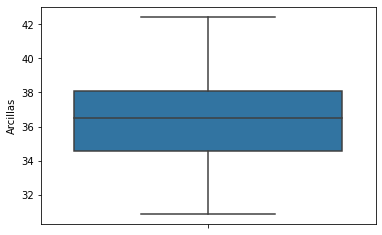

In [15]:
sns.boxplot( y=datos["Arcillas"] );
plt.show()

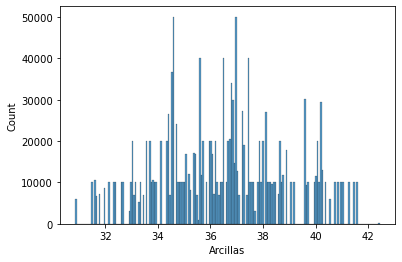

In [16]:
sns.histplot(data=datos, x="Arcillas")
plt.show()

<hr>
<h4>3. ARENAS (Continua)</h4>
<p>Datos únicos: </p>

In [17]:
print(datos.Arenas.unique())

[33.87572479 17.72201538 18.06327057 12.8685379  32.81736755 10.40031433
 14.30979919 15.34599304 15.55557251 21.33428955 19.46343994 19.37958527
 24.7039032  27.6778183  19.90520477 12.42074585 18.51131439 10.60609436
 13.87342072 17.4365387  15.21798706 18.85947418 19.29058075 22.83244324
 18.45509338 19.32624817 17.15637207 14.94346619 17.34638977 15.49411011
 13.98884583 21.04186249 22.16967773 22.12031555 18.05319977 14.9806366
 18.30436707 15.55264282 24.29151917 20.1652832  15.59536743 17.84686279
 20.44515991 17.51477814 16.32917023 15.6714859  25.71530151 24.76519012
 21.43106079 20.7848587  12.76719666 13.83258057 21.09503937 13.44683838
 19.03224182 20.22583008 21.26091003 16.4384079  21.59572601 22.6023407
 15.44644165 15.22372437  9.73020935 17.87393188 16.68841553 17.68596649
 18.81881714 16.51608276 18.76370239 17.00587463 19.44039917 23.69554138
 25.48713684 21.09468842 12.89600372 13.617836   19.93925476 16.29865265
 20.10293579 21.81542206 14.46324921 19.49223328 23.6

In [18]:
print("Máximo: ", max(datos.Arenas))
print("Mínimo: ", min(datos.Arenas))
print("Media: ", datos["Arenas"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  33.87572479248047
Mínimo:  9.730209350585938
Media:  18.928458702632465
STD:  4.123052954286027


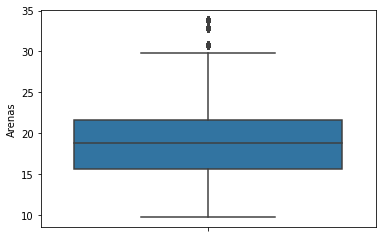

In [19]:
sns.boxplot( y=datos["Arenas"] );
plt.show()

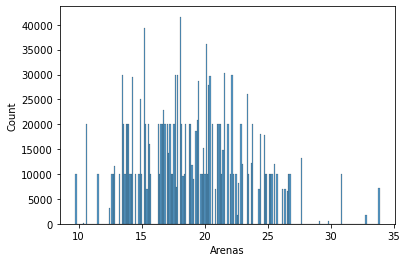

In [20]:
sns.histplot(data=datos, x="Arenas")
plt.show()

<hr>
<h4>4. CARBONATOS (Discreta)</h4>
<p>Datos únicos: </p>

In [21]:
print(datos.Carbonatos.unique())

[0.78811705 1.79775369 1.53975677]


In [22]:
print("Máximo: ", max(datos.Carbonatos))
print("Mínimo: ", min(datos.Carbonatos))
print("Media: ", datos["Carbonatos"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  1.7977536916732788
Mínimo:  0.7881170511245728
Media:  1.5881183053606882
STD:  4.123052954286027


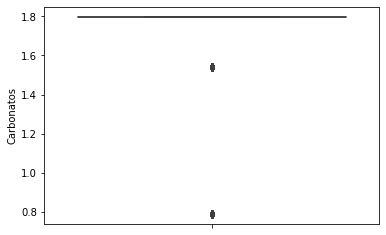

In [23]:
sns.boxplot( y=datos["Carbonatos"] );
plt.show()

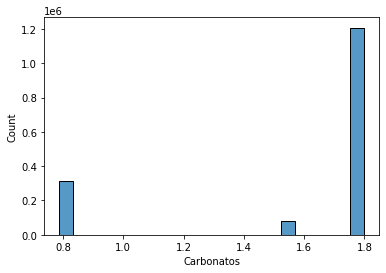

In [24]:
sns.histplot(data=datos, x="Carbonatos")
plt.show()

<hr>
<h4>4. CARBONO ORGÁNICO (Continua)</h4>
<p>Datos únicos: </p>

In [25]:
print(datos.Carbono_Organico.unique())

[285.146698   304.39660645 308.1880188  327.4697876  274.49468994
 390.69924927 255.46438599 231.16914368 317.78106689 351.97528076
 501.88345337 485.07629395 500.49411011 192.77412415 505.90756226
 437.30740356 244.12886047 296.19656372 335.49963379 399.75363159
 333.85925293 538.64025879 525.03076172 520.26818848 476.2571106
 437.47964478 165.88427734 263.77172852 244.25024414 364.99520874
 390.57281494 557.08435059 534.84680176 514.61987305 529.63024902
 420.05392456 418.20883179 431.64245605 284.72869873 265.2824707
 331.04098511 324.39083862 350.01348877 492.18630981 515.67126465
 498.11352539 444.07666016 441.54541016 407.47875977 288.74642944
 231.12298584 257.7883606  488.79104614 491.54714966 541.88995361
 522.85546875 526.21435547 544.19281006 476.99679565 457.30105591
 287.63095093 301.60812378 286.22912598 408.1696167  455.81478882
 531.11737061 554.4354248  576.9942627  503.84866333 448.64871216
 453.76150513 461.82733154 320.76239014 317.91958618 269.42910767
 471.3029174

In [26]:
print("Máximo: ", max(datos.Carbono_Organico))
print("Mínimo: ", min(datos.Carbono_Organico))
print("Media: ", datos["Carbono_Organico"].mean())
print("STD: ", datos["Carbono_Organico"].std())

Máximo:  576.9942626953125
Mínimo:  165.88427734375
Media:  431.52598911731616
STD:  88.84059099156663


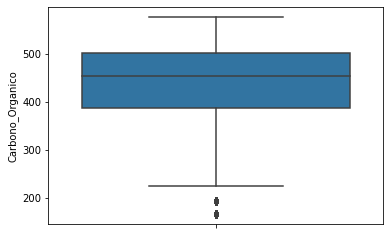

In [27]:
sns.boxplot( y=datos["Carbono_Organico"] );
plt.show()

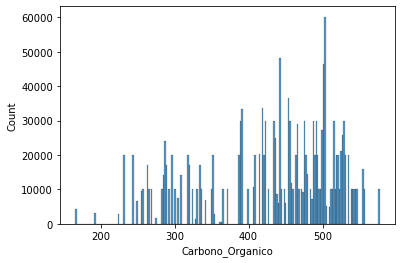

In [28]:
sns.histplot(data=datos, x="Carbono_Organico")
plt.show()

<hr>
<h4>5. CÁRCAVAS (Categórica)</h4>
<p>Datos únicos: </p>

In [29]:
print(datos.Carcavas.unique())

[0. 1.]


In [30]:
print("Máximo: ", max(datos.Carcavas))
print("Mínimo: ", min(datos.Carcavas))
print("Media: ", datos["Carcavas"].mean())
print("STD: ", datos["Carcavas"].std())

Máximo:  1.0
Mínimo:  0.0
Media:  0.030057170394059536
STD:  0.17074470752502366


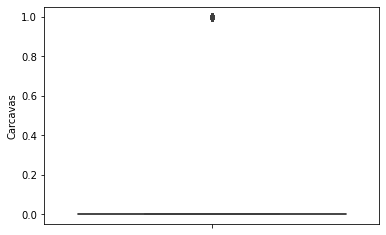

In [31]:
sns.boxplot( y=datos["Carcavas"] );
plt.show()

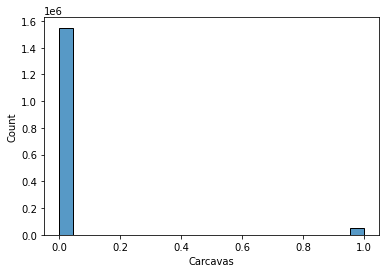

In [32]:
sns.histplot(data=datos, x="Carcavas")
plt.show()

<hr>
<h4>6. CURVATURA PERFIL (Continua)</h4>
<p>Datos únicos: </p>

In [33]:
print(datos.Curvatura_Perfil.unique())

[-0.00183517 -0.00184951  0.00061803 ...  0.00181466 -0.00440698
 -0.00369884]


In [34]:
print("Máximo: ", max(datos.Curvatura_Perfil))
print("Mínimo: ", min(datos.Curvatura_Perfil))
print("Media: ", datos["Curvatura_Perfil"].mean())
print("STD: ", datos["Curvatura_Perfil"].std())

Máximo:  0.25045478343963623
Mínimo:  -0.4562755525112152
Media:  3.3407002133693396e-05
STD:  0.015444187509799864


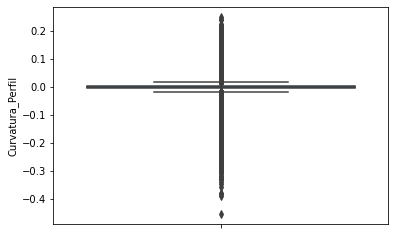

In [35]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()

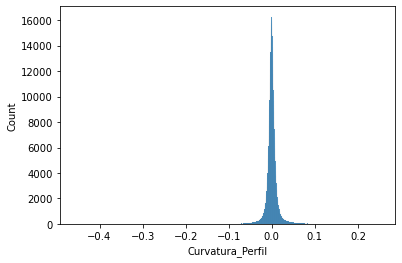

In [36]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

<hr>
<h4>7. CURVATURA PLANA (Continua)</h4>
<p>Datos únicos: </p>

In [37]:
print(datos.Curvatura_Plana.unique())

[-0.12451447 -0.06756548  0.03689012 ...  0.04878346 -0.01525788
 -0.0157585 ]


In [38]:
print("Máximo: ", max(datos.Curvatura_Plana))
print("Mínimo: ", min(datos.Curvatura_Plana))
print("Media: ", datos["Curvatura_Plana"].mean())
print("STD: ", datos["Curvatura_Plana"].std())

Máximo:  158.94403076171875
Mínimo:  -82.95050811767578
Media:  -0.001002467858022653
STD:  0.21050333931209222


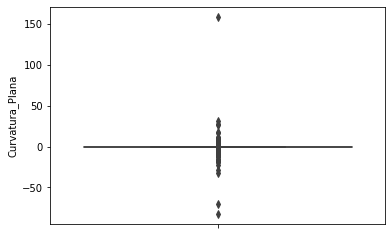

In [39]:
sns.boxplot( y=datos["Curvatura_Plana"] );
plt.show()

<hr>
<h4>8. DISTANCIA CARRETERAS (Continua)</h4>
<p>Datos únicos: </p>

In [40]:
print(datos.Distancia_Carreteras.unique())

[ 327.18496704  324.07562256  321.01400757 ... 1496.27868652 1470.34863281
 1485.43762207]


In [41]:
print("Máximo: ", max(datos.Distancia_Carreteras))
print("Mínimo: ", min(datos.Distancia_Carreteras))
print("Media: ", datos["Distancia_Carreteras"].mean())
print("STD: ", datos["Distancia_Carreteras"].std())

Máximo:  1709.334716796875
Mínimo:  0.0
Media:  550.2662335680966
STD:  403.9126048354622


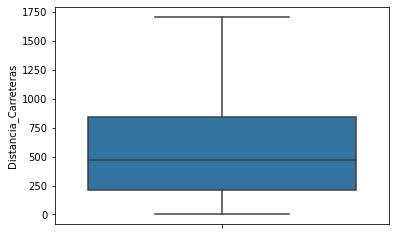

In [42]:
sns.boxplot( y=datos["Distancia_Carreteras"] );
plt.show()

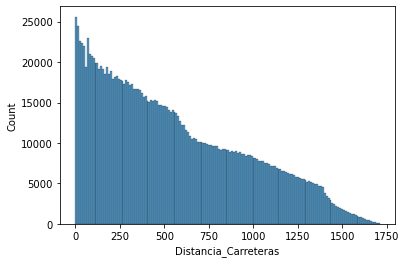

In [43]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>
<h4>9. FACTOR LS (Continua)</h4>
<p>Datos únicos: </p>

In [44]:
print(datos.Factor_LS.unique())

[ 0.7407  0.8496  0.5347 ... 11.665   9.3023 10.5699]


In [45]:
print("Máximo: ", max(datos.Factor_LS))
print("Mínimo: ", min(datos.Factor_LS))
print("Media: ", datos["Factor_LS"].mean())
print("STD: ", datos["Factor_LS"].std())

Máximo:  109282.8281
Mínimo:  0.0
Media:  35.386319052168055
STD:  757.5804617922471


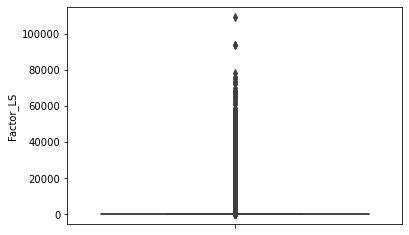

In [46]:
sns.boxplot( y=datos["Factor_LS"] );
plt.show()

<hr>
<h4>10. GEOLOGIA (Categórica)</h4>
<p>Datos únicos: </p>

In [47]:
print(datos.Geologia.unique())

[6. 4. 5. 2. 1. 3.]


In [48]:
print("Máximo: ", max(datos.Geologia))
print("Mínimo: ", min(datos.Geologia))
print("Media: ", datos["Geologia"].mean())
print("STD: ", datos["Geologia"].std())

Máximo:  6.0
Mínimo:  1.0
Media:  3.8099833839741404
STD:  0.6299384523891146


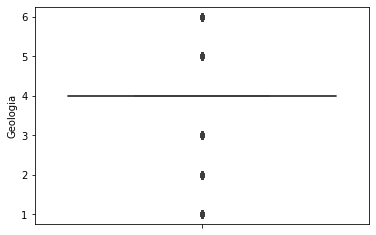

In [49]:
sns.boxplot( y=datos["Geologia"] );
plt.show()

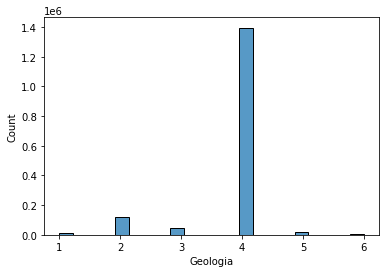

In [50]:
sns.histplot(data=datos, x="Geologia")
plt.show()

<hr>
<h4>11. LIMOS (Continua)</h4>
<p>Datos únicos: </p>

In [51]:
print(datos.Limos.unique())

[34.36614227 45.46409225 44.72913742 47.08349991 35.52183533 47.16384888
 45.47115707 46.80448151 47.49399948 46.37127304 45.10635376 44.5092392
 40.21770477 39.4064064  46.79101562 47.31301117 43.38642502 49.29040527
 45.91330719 44.14500427 51.17815018 47.81594086 46.36906815 43.28029251
 46.96247864 48.68807983 46.12511826 48.72214508 46.79764175 46.23837662
 48.44787979 44.5215683  46.3616066  44.11801529 44.99458694 44.02661133
 43.34886169 47.17279053 42.63620377 45.23182678 45.74852371 46.13512421
 44.38256073 47.46865845 46.24105835 46.8848381  42.14260483 40.61928558
 43.04967499 41.81665802 47.63878632 45.44713593 46.49720001 49.5751915
 44.74920654 43.75881958 42.80666733 43.32799149 41.72814941 41.73824692
 46.43943787 45.69335556 49.24763107 45.07496262 47.73125458 48.75404739
 47.05492783 49.67920685 43.08116531 45.77487183 43.77780914 40.50045013
 40.07164001 41.99282455 45.65740204 47.47563934 45.21114731 46.20895767
 45.55035019 43.39310837 46.85840988 40.91582489 41.1

In [52]:
print("Máximo: ", max(datos.Limos))
print("Mínimo: ", min(datos.Limos))
print("Media: ", datos["Limos"].mean())
print("STD: ", datos["Limos"].std())

Máximo:  51.17815017700195
Mínimo:  34.36614227294922
Media:  44.60974582930064
STD:  2.791150738675267


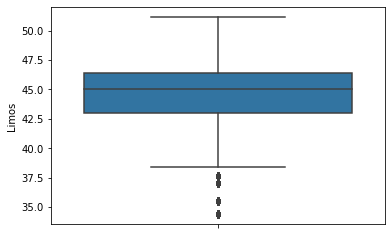

In [53]:
sns.boxplot( y=datos["Limos"] );
plt.show()

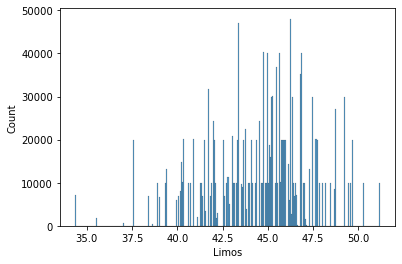

In [54]:
sns.histplot(data=datos, x="Limos")
plt.show()

<hr>
<h4>12. ORIENTACIONES (Categórica)</h4>
<p>Datos únicos: </p>

In [55]:
print(datos.Orientaciones.unique())

[8. 1. 2. 6. 7. 3. 5. 4.]


In [56]:
print("Máximo: ", max(datos.Orientaciones))
print("Mínimo: ", min(datos.Orientaciones))
print("Media: ", datos["Orientaciones"].mean())
print("STD: ", datos["Orientaciones"].std())

Máximo:  8.0
Mínimo:  1.0
Media:  5.474087448485626
STD:  2.2560598365017257


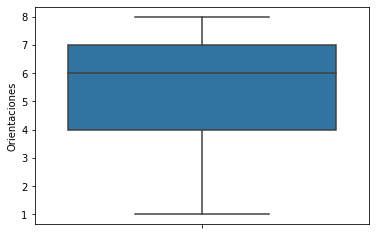

In [57]:
sns.boxplot( y=datos["Orientaciones"] );
plt.show()

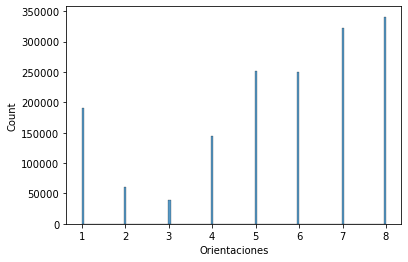

In [58]:
sns.histplot(data=datos, x="Orientaciones")
plt.show()

<hr>
<h4>13. OVERLAND FLOW DISTANCE (Continua)</h4>
<p>Datos únicos: </p>

In [59]:
print(datos.Overland_Flow_Distance.unique())

[558.69122314 564.8447876  571.91186523 ... 207.25691223 199.49252319
 200.25138855]


In [60]:
print("Máximo: ", max(datos.Overland_Flow_Distance))
print("Mínimo: ", min(datos.Overland_Flow_Distance))
print("Media: ", datos["Overland_Flow_Distance"].mean())
print("STD: ", datos["Overland_Flow_Distance"].std())

Máximo:  10095.7265625
Mínimo:  0.0
Media:  3182.59440352746
STD:  2065.3382336858294


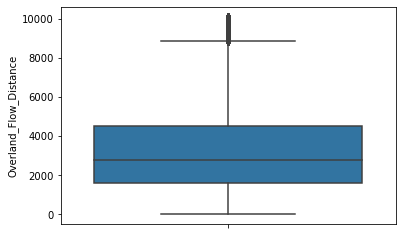

In [61]:
sns.boxplot( y=datos["Overland_Flow_Distance"] );
plt.show()

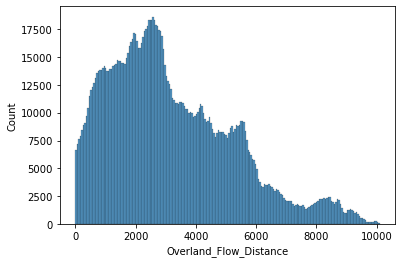

In [62]:
sns.histplot(data=datos, x="Overland_Flow_Distance")
plt.show()

<hr>
<h4>14. PENDIENTE (Continua)</h4>
<p>Datos únicos: </p>

In [63]:
print(datos.Pendiente.unique())

[2.61290288 2.69291973 2.88967514 ... 7.06149673 7.0793829  6.83673286]


In [64]:
print("Máximo: ", max(datos.Pendiente))
print("Mínimo: ", min(datos.Pendiente))
print("Media: ", datos["Pendiente"].mean())
print("STD: ", datos["Pendiente"].std())

Máximo:  56.52096939086914
Mínimo:  0.0
Media:  10.138483603019795
STD:  5.4317060626202585


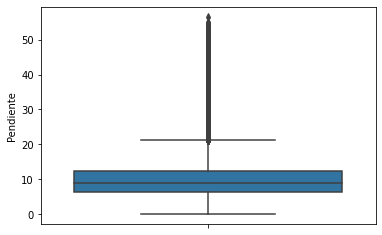

In [65]:
sns.boxplot( y=datos["Pendiente"] );
plt.show()

<hr>
<h4>15. STREAM POWER INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [66]:
print(datos.Stream_Power_Index.unique())

[-1066.79821777  -571.08001709  -164.47866821 ...  1587.32763672
   382.09741211  1028.82055664]


In [67]:
print("Máximo: ", max(datos.Stream_Power_Index))
print("Mínimo: ", min(datos.Stream_Power_Index))
print("Media: ", datos["Stream_Power_Index"].mean())
print("STD: ", datos["Stream_Power_Index"].std())

Máximo:  551972864.0
Mínimo:  -3720811520.0
Media:  -2197.2379256956137
STD:  3114497.077827948


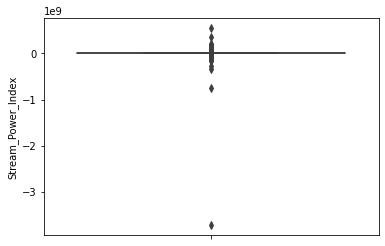

In [68]:
sns.boxplot( y=datos["Stream_Power_Index"] );
plt.show()

<hr>
<h4>16. TOPOGRAPHIC POSITION INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [69]:
print(datos.Topographic_Position_Index.unique())

[-1.3603363  -1.43238044 -1.4690237  ... -5.94215775 -6.30127287
 -6.18561172]


In [70]:
print("Máximo: ", max(datos.Topographic_Position_Index))
print("Mínimo: ", min(datos.Topographic_Position_Index))
print("Media: ", datos["Topographic_Position_Index"].mean())
print("STD: ", datos["Topographic_Position_Index"].std())

Máximo:  21.639244079589844
Mínimo:  -26.37703514099121
Media:  0.03530094478042968
STD:  3.2229483229286338


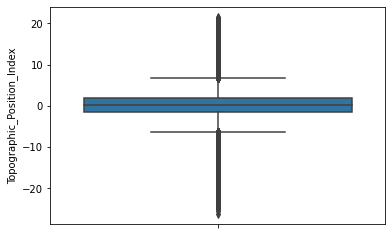

In [71]:
sns.boxplot( y=datos["Topographic_Position_Index"] );
plt.show()

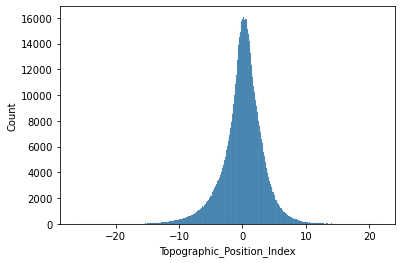

In [72]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>
<h4>17. TOPOGRAPHIC WETNESS INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [73]:
print(datos.Topographic_Wetness_Index.unique())

[14.50175381 14.40320873 14.07023048 ...  7.48375463  8.70713806
  7.74621296]


In [74]:
print("Máximo: ", max(datos.Topographic_Wetness_Index))
print("Mínimo: ", min(datos.Topographic_Wetness_Index))
print("Media: ", datos["Topographic_Wetness_Index"].mean())
print("STD: ", datos["Topographic_Wetness_Index"].std())

Máximo:  20.13279914855957
Mínimo:  -10.7699556350708
Media:  9.704938522499742
STD:  3.797291892080003


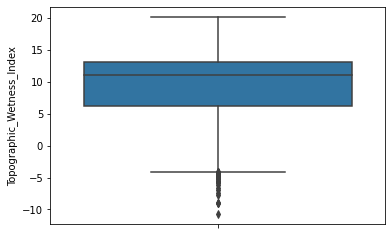

In [75]:
sns.boxplot( y=datos["Topographic_Wetness_Index"] );
plt.show()

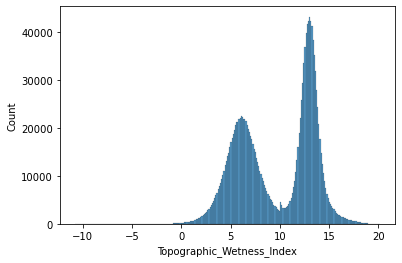

In [76]:
sns.histplot(data=datos, x="Topographic_Wetness_Index")
plt.show()

<hr>
<h4>18. UNIDADES EDÁFICAS (Categórica)</h4>
<p>Datos únicos: </p>

In [77]:
print(datos.Unidades_Edaficas.unique())

[22. 48. 44. 23.]


In [78]:
print("Máximo: ", max(datos.Unidades_Edaficas))
print("Mínimo: ", min(datos.Unidades_Edaficas))
print("Media: ", datos["Unidades_Edaficas"].mean())
print("STD: ", datos["Unidades_Edaficas"].std())

Máximo:  48.0
Mínimo:  22.0
Media:  45.824032218192514
STD:  4.969856073481469


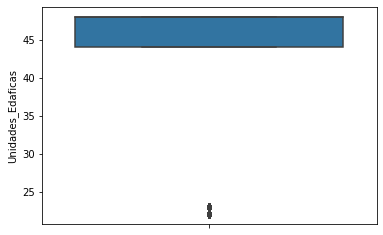

In [79]:
sns.boxplot( y=datos["Unidades_Edaficas"] );
plt.show()

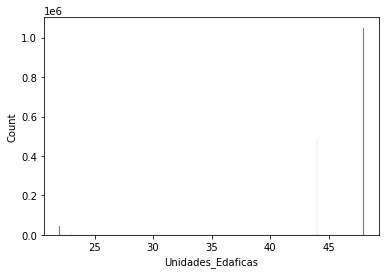

In [80]:
sns.histplot(data=datos, x="Unidades_Edaficas")
plt.show()

<hr>
<h4>19. USOS DEL SUELO (Categórica)</h4>
<p>Datos únicos: </p>

In [81]:
print(datos.Usos_Del_Suelo.unique())

[3. 4. 2.]


In [82]:
print("Máximo: ", max(datos.Usos_Del_Suelo))
print("Mínimo: ", min(datos.Usos_Del_Suelo))
print("Media: ", datos["Usos_Del_Suelo"].mean())
print("STD: ", datos["Usos_Del_Suelo"].std())

Máximo:  4.0
Mínimo:  2.0
Media:  2.9834972510021247
STD:  0.22266038129496996


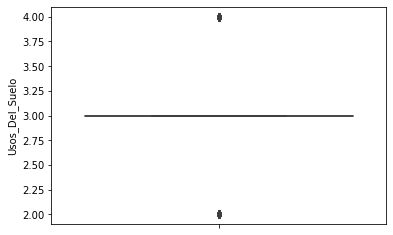

In [83]:
sns.boxplot( y=datos["Usos_Del_Suelo"] );
plt.show()

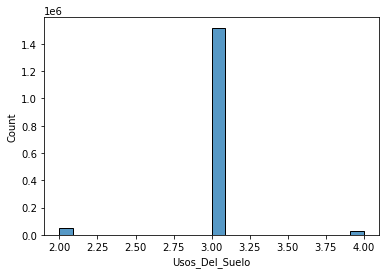

In [84]:
sns.histplot(data=datos, x="Usos_Del_Suelo")
plt.show()

<hr>
<h3>Matriz de correlación de variables</h3>

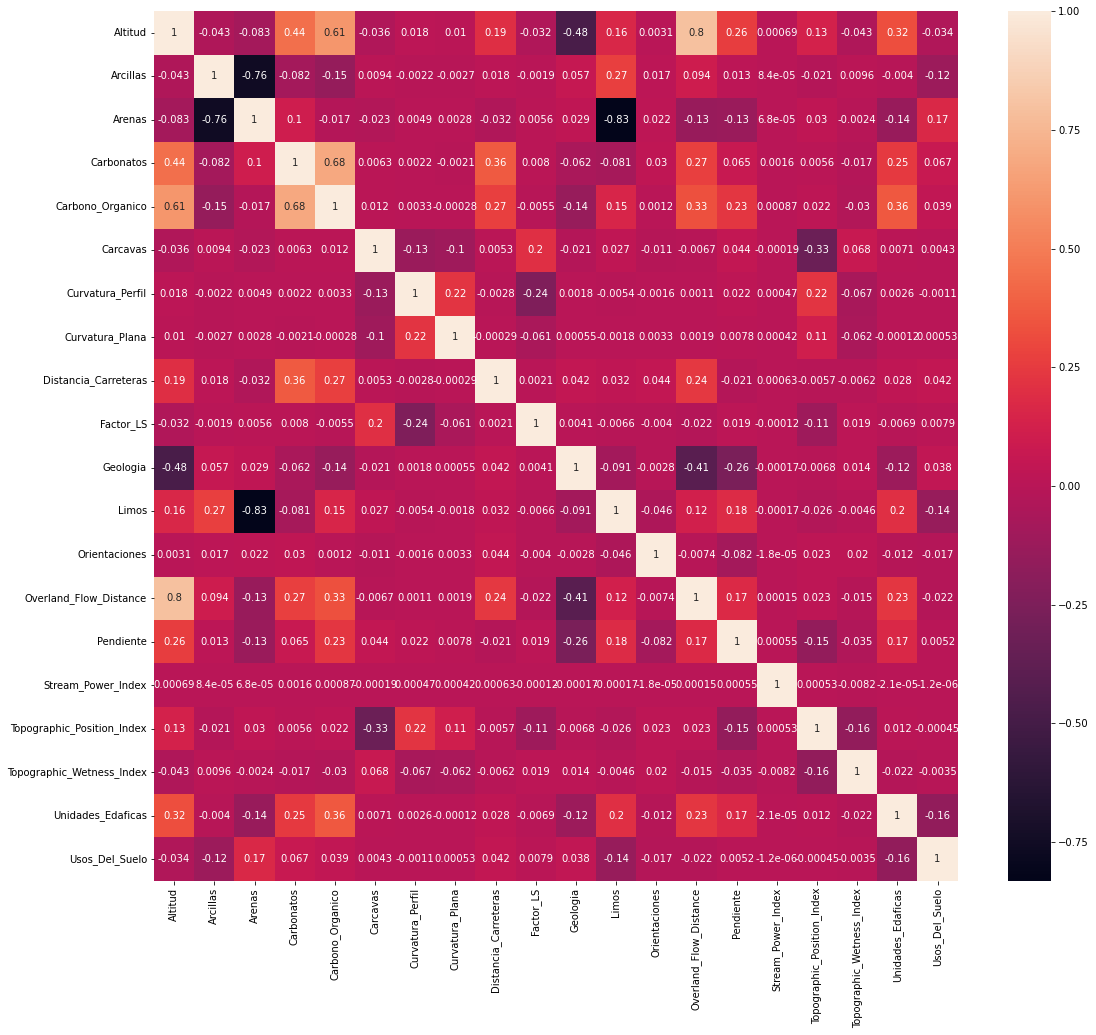

In [89]:
corr_datos = datos.corr(method='pearson')

plt.figure(figsize=(18, 16))
sns.heatmap(corr_datos, annot=True)
plt.show()